In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

T-shirt/top


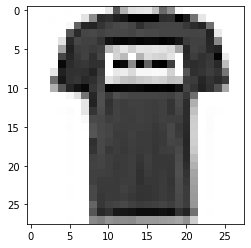

In [4]:
n=1
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

In [5]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test_ = to_categorical(y_test)

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

In [9]:
inputA = Input(shape=(28,28,1,))

In [10]:
x = Conv2D(16, (3,3), padding='same', activation = 'relu')(inputA)

In [11]:
x = MaxPooling2D(pool_size=(2,2))(x)

In [12]:
x = Conv2D(32, (3,3), padding='same', activation = 'relu')(x)

In [13]:
x = MaxPooling2D(pool_size=(2,2))(x)

In [14]:
x = Conv2D(64, (3,3), padding='same', activation = 'relu')(x)

In [15]:
x = MaxPooling2D(pool_size=(2,2))(x)

In [16]:
x = Flatten()(x)

In [17]:
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [18]:
model = Model(inputs = inputA ,outputs = x)

In [19]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0     

In [24]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [25]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 326us/sample - loss: 0.0896 - accuracy: 0.1411
Epoch 2/20
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0883 - accuracy: 0.3060
Epoch 3/20
60000/60000 [==============================] - 19s 312us/sample - loss: 0.0811 - accuracy: 0.4356
Epoch 4/20
60000/60000 [==============================] - 19s 311us/sample - loss: 0.0518 - accuracy: 0.6257
Epoch 5/20
60000/60000 [==============================] - 19s 311us/sample - loss: 0.0409 - accuracy: 0.7021
Epoch 6/20
60000/60000 [==============================] - 19s 313us/sample - loss: 0.0375 - accuracy: 0.7306
Epoch 7/20
60000/60000 [==============================] - 19s 312us/sample - loss: 0.0352 - accuracy: 0.7495
Epoch 8/20
60000/60000 [==============================] - 19s 310us/sample - loss: 0.0334 - accuracy: 0.7651
Epoch 9/20
60000/60000 [==============================] - 19s 310us/sample - loss: 0.0319 - accuracy: 0.7

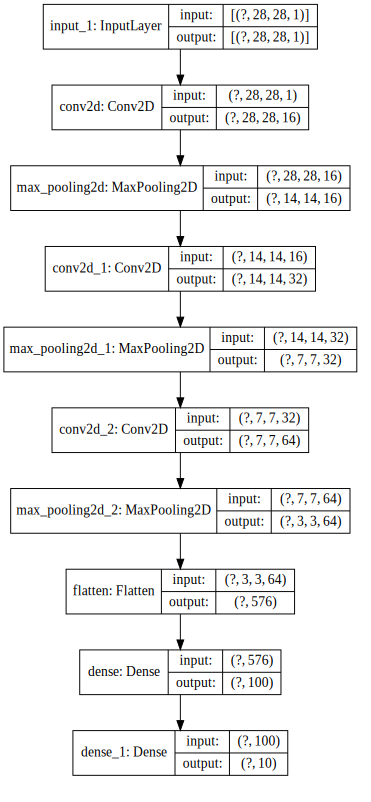

In [37]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model, dpi=70, show_shapes=True).create(prog='dot', format='svg'))

In [35]:
import pydot


In [39]:
score = model.evaluate(x_test, y_test_, verbose=0)
print("正確率為：", score[1])

正確率為： 0.8266


In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model,,to_file='model.png')

TypeError: plot_model() got an unexpected keyword argument 'show_shape'

In [44]:
!pip install pydot

In [23]:
tf.__version__

'2.0.0'